In [1]:
import json
import random
import csv

from pprint import pprint

In [2]:
from soccer_player import SoccerPlayer
with open("data/augmented_players.json", "r") as f:
    players = [SoccerPlayer(p) for p in json.loads(f.read())]

In [3]:
min_mins_requirement = 900
min_games = 10

player_map = {}

for p in players:
    player_map[p.get_display_name()] = p

## When choosing a random player, restrict the subset to players people would actually know
filtered_players = [p for p in players if p.appearances >= min_games and p.mins_played > min_mins_requirement and p.position != "G"]
print(len(filtered_players))
def pick_random_player():
    return random.choice(list(filtered_players))

263


In [4]:
from IPython.display import Image, display
import requests

# def display_player_photo(player: SoccerPlayer):
#     base_path = "data/photos/"
#     path = base_path + "/photos/40x40/%s.png" % player.opta_id
#     display(Image(filename=path))


def display_player_photo(player: SoccerPlayer):
    url = "https://resources.premierleague.com/premierleague/photos/players/40x40/%s.png" % player.opta_id
    response = requests.get(url)
    if response.status_code == 200:
        display(Image(response.content))

In [5]:
## Initialize the Country -> Continent Mapping
confederation_mapping = {}
with open("data/fifa.csv", "r") as f:
    reader = csv.reader(f, delimiter=',')
    next(reader)
    for row in reader:
        confederation_mapping[row[0]] = row[1]

In [6]:
## Initialize Type Ahead Search
from player_type_ahead import PlayerTypeAhead
type_ahead_helper = PlayerTypeAhead(players)

In [7]:
## Initialize EPL Table
from epl_table import EPLTable
epl_table = EPLTable("data/epl_table.json")

In [8]:
## Initialize the Hint Configuration File!!
from hint_config import HintConfig
team_d = 3 
goal_d = 3
assist_d = 3 
app_d = 3
age_d = 3 
jersey_d = 3 

hint_config = HintConfig(team_d, goal_d, assist_d, app_d, age_d, jersey_d)


max_guesses = 8

In [9]:
from guess_history import GuessHistory

def main():
    answer = pick_random_player()
    guess_history = GuessHistory(hint_config)
    
    try:
        while (len(guess_history.guesses) < max_guesses):
            player_name_guess = ""
            while player_name_guess == "":
                input_name = input("PLAYER NAME: ")

                if input_name.upper() == "BREAK":
                    raise ValueError('Breaking out of the program!')


                valid_names = type_ahead_helper.search_ahead(input_name)
                if len(valid_names) == 1:
                    name = valid_names.pop()
                    if name in [p.get_display_name() for p in guess_history.guesses]:
                        print("DUMBASS! You already guessed that")
                    else:
                        player_name_guess = name
                else:
                    print("VAlID NAMES: " + ", ".join(valid_names))
            
            guess = player_map[player_name_guess]
            display_player_photo(guess)
            

            if guess.name == answer.name:
                print(answer.get_display_name() + " is correct! YOU WIN!!")
                break
            else:
                guess_history.add_guess(guess)
                guess_history.print_history(answer, epl_table, confederation_mapping)
                
                
    except ValueError as err:
        print(err.args)
    
    if len(guess_history.guesses) >= max_guesses:
        print("YOU LOSE!")
        print("Correct answer was: " + answer.get_display_name())
        display_player_photo(answer)
        print(answer)

PLAYER NAME: Thiago


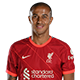

                                                                                
    Name       Team  Country  Position  Age  Jersey  Goals  Assists  Appearances
  Thiago  Liverpool    Spain         M   30       6      1        2           17
       X          ↑     UEFA         ✓    X       X      X        ↑            X
PLAYER NAME: Thiago Silva


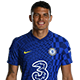

                                                                                      
          Name       Team  Country  Position  Age  Jersey  Goals  Assists  Appearances
        Thiago  Liverpool    Spain         M   30       6      1        2           17
             X          ↑     UEFA         ✓    X       X      X        ↑            X
  Thiago Silva    Chelsea   Brazil         D   37       6      3        0           23
             X          ↑        X         X    X       X      X        ↑            ↓
PLAYER NAME: Foden


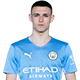

Phil Foden is correct! YOU WIN!!


In [10]:
main()